In [154]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [155]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
# tags = ['2024-04-12-15-31-26']
# filters = {"tags": {"$in": tags}}
runs = ["amber-flower-1705", "zany-cherry-1704", "lively-salad-1703"]
filters = {"display_name": {"$in": runs }}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [156]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)
df

100%|██████████| 3/3 [00:00<00:00, 24576.00it/s]


,_runtime,_timestamp,Evaluation/Mean_Entropy,Evaluation/Mean_Returns,Evaluation/Mean_Discounted_Returns,Evaluation/Returns,Evaluation/Entropies,_step,_wandb,Evaluation/Timesteps,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,22.664437,1.713789e+09,0.134204,-13.000000,-13.000000,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'bins': [0.12204878777265549, 0.1224571317434...",0,{'runtime': 22},"{'_type': 'histogram', 'bins': [12.5, 12.51562...",...,0.3,1,identity,coordinate,0.0001,PolicyUCT,6,mvc,10,identity
1,24.305810,1.713789e+09,0.606899,-15.230000,-15.230000,"{'_type': 'histogram', 'bins': [-18, -17.92187...","{'_type': 'histogram', 'bins': [0.522961080074...",0,{'runtime': 24},"{'bins': [13, 13.078125, 13.15625, 13.234375, ...",...,0.3,1,identity,coordinate,0.0001,UCT,6,mvc,10,identity
2,27.541049,1.713789e+09,0.772112,-21.370001,-21.370001,"{'_type': 'histogram', 'bins': [-37, -36.6875,...","{'bins': [0.7186489701271057, 0.72074741125106...",0,{'runtime': 27},"{'values': [16, 0, 0, 11, 0, 0, 16, 0, 0, 6, 0...",...,0.3,1,identity,coordinate,0.0001,UCT,6,visit,10,identity


In [157]:
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
# group the data by policy combination and extract a dict trajo = {$policy_combination: trajectories} where trajectories is the first item in the trajectories column
trajos = df.groupby('policy_combination')['trajectories'].apply(lambda x: x.iloc[0]).to_dict()

trajos

{'mvc+PolicyUCT': [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 

In [158]:

trajectories = trajos["mvc+PolicyUCT"]
trajectories

[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 

In [159]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

ncols, nrows = df["ncols"][0], 6
# trajectories is list of trajectories where each trajectory is list of states

visits = np.zeros((nrows, ncols), dtype = int)
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols = ncols)
        visits[row, col] += 1

visits

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [160]:
density = visits / visits.sum()
density

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308],
       [0.07692308, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

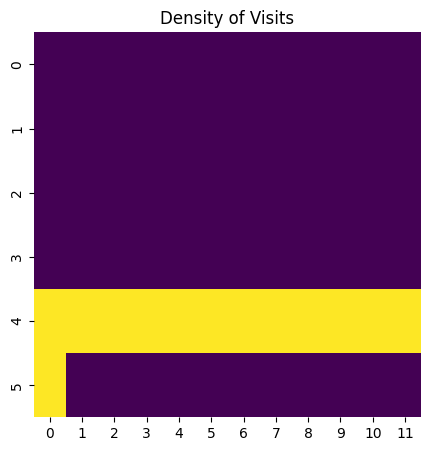

In [161]:
# render env heatmap with density
plt.figure(figsize=(5, 5))
# remove the numbers on x and y axis
sns.heatmap(density, annot=False, cmap="viridis", cbar=False)
plt.title("Density of Visits")
plt.show()

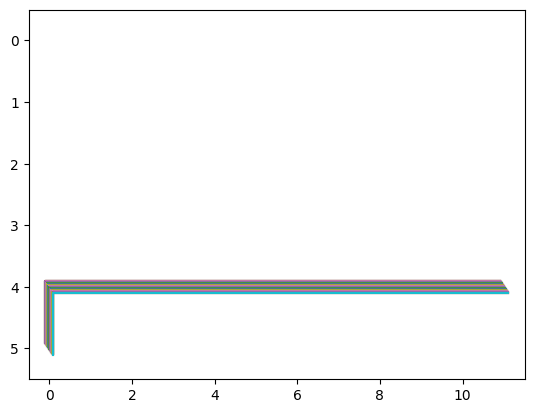

In [162]:
# Define offsets for each trajectory to reduce overlap
offsets = np.linspace(-0.1, 0.1, len(trajectories))

# Create a plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)

ax.invert_yaxis()  # Invert the y-axis so the top-left is (0,0)

# Plot each trajectory with offset
for idx, (trajectory, offset) in enumerate(zip(trajectories, offsets)):
    coords = [obs_to_cords(state, ncols) for state in trajectory]
    rows, cols = zip(*coords)
    # Apply the offset
    cols = [col + offset for col in cols]
    rows = [row + offset for row in rows]
    ax.plot(cols, rows, label=f'Trajectory {idx+1}')


plt.show()

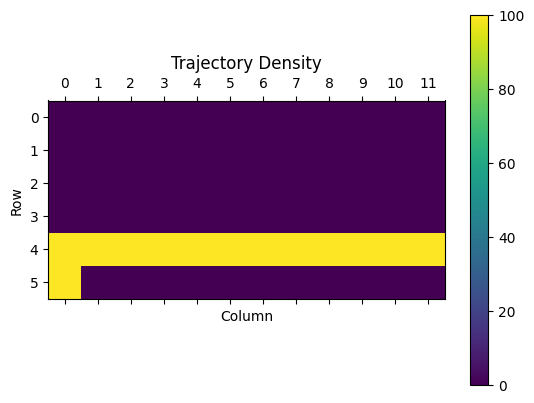

In [163]:
# Initialize the grid matrix
density = np.zeros((nrows, ncols))

# Increment the density for each state visited in each trajectory
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols)
        density[row, col] += 1

# Create a heatmap
fig, ax = plt.subplots()
cax = ax.matshow(density, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_xticklabels(range(ncols))
ax.set_yticklabels(range(nrows))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Trajectory Density')

plt.show()

In [164]:
# plot heatmap of the density

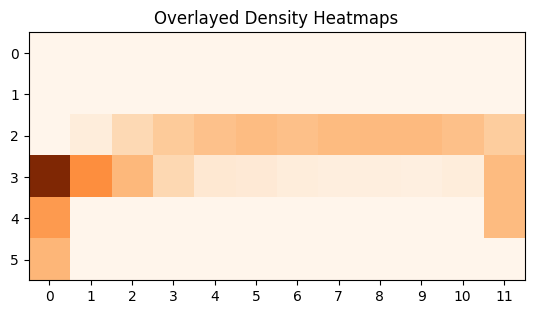

In [182]:
def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density
fig, ax = plt.subplots()
alpha = 1.0  # Transparency level
cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys']
for trajectory_name in trajos.keys():
    trajectories = trajos[trajectory_name]
    density = calculate_density(trajectories, ncols, nrows)
    ax.imshow(density, cmap=cmaps.pop(), alpha=alpha)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_title('Overlayed Density Heatmaps')

plt.show()

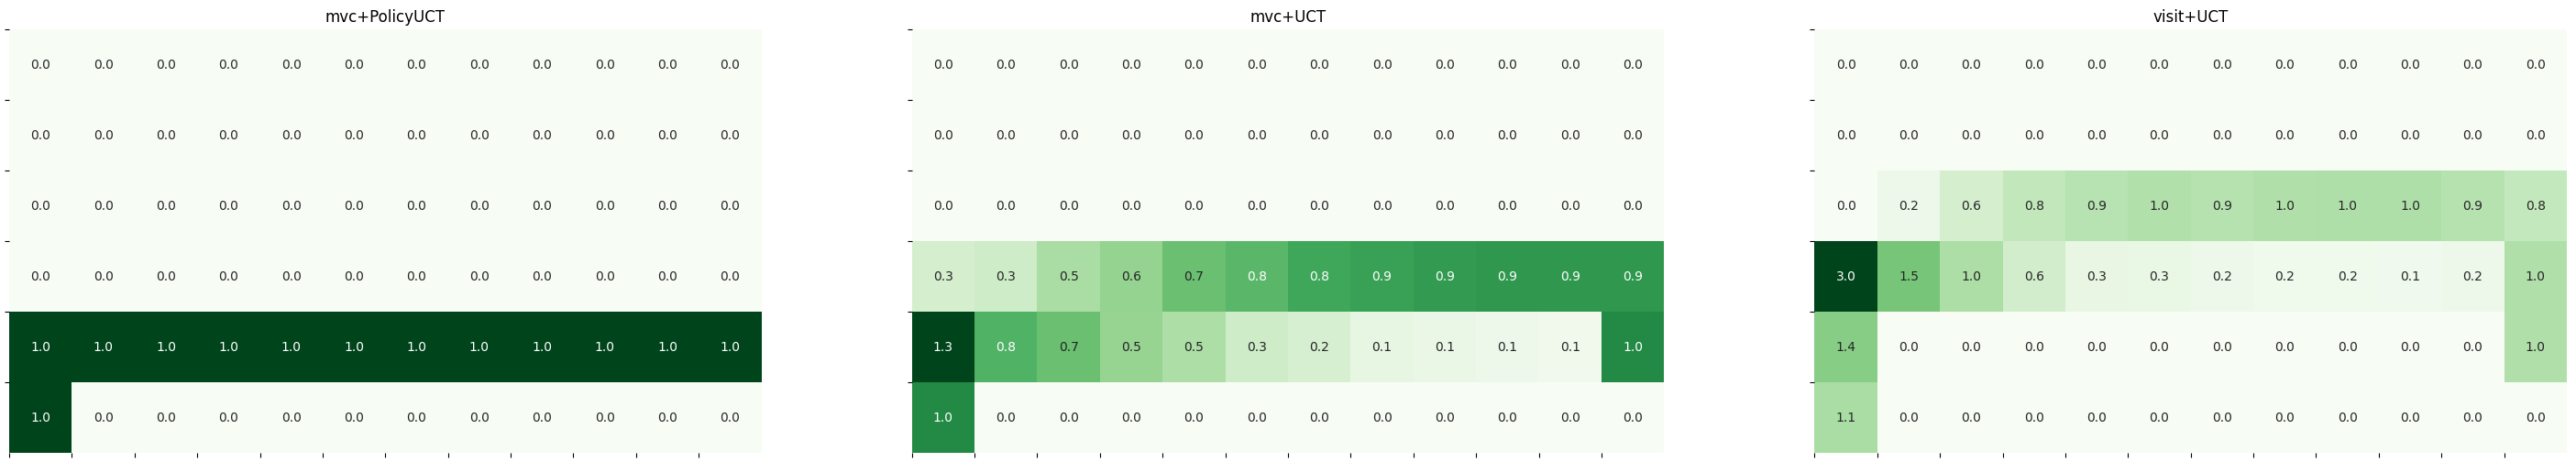

In [203]:
# create subplots where each subplot is a heatmap of the density of visits for a trajectory. use seaborn, matplotlib or any other library

heatmaps = len(trajos)

fig, axs = plt.subplots(1, heatmaps, figsize=(ncols*heatmaps, nrows))
for idx, (trajectory_name, trajectories) in enumerate(trajos.items()):
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    sns.heatmap(density, ax=axs[idx], cmap='Greens', cbar=False, annot=True, fmt='.1f')
    axs[idx].set_title(trajectory_name)
    axs[idx].set_xticks(range(ncols))
    axs[idx].set_yticks(range(nrows))

# save as svg
# plt.savefig('density_heatmaps.svg')

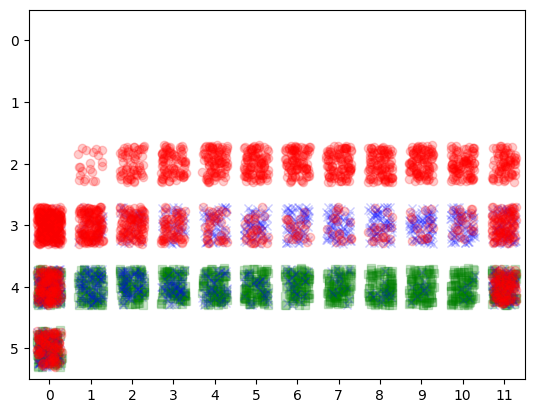

In [178]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))

# Function to plot trajectories
def plot_swarm(trajectories, color, marker):
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            # Random jitter within the cell to avoid overlap
            jitter = .3
            jitter_x = np.random.uniform(-jitter, jitter)
            jitter_y = np.random.uniform(-jitter, jitter)
            ax.plot(col + jitter_x, row + jitter_y, marker=marker, color=color, alpha=0.2)

colors = ['red', 'blue', 'green']
markers = ['o', 'x', 's']
for trajectory_name in trajos.keys():
    plot_swarm(trajos[trajectory_name], colors.pop(), markers.pop())

ax.invert_yaxis()  # Invert the y-axis to match the matrix indexing

plt.show()

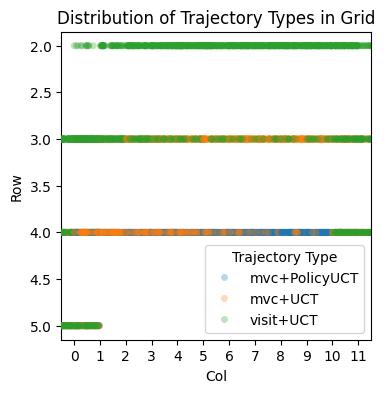

In [171]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col


# Prepare DataFrame
data = []

for t_type, traj_list in trajos.items():
    for traj in traj_list:
        for state in traj:
            row, col = obs_to_cords(state, ncols)
            data.append({'Type': t_type, 'Row': row, 'Col': col})

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(4, 4))
sns.stripplot(data=df, x='Col', y='Row', hue='Type', jitter=1.0, dodge=False, marker='o', alpha=0.3)

plt.gca().invert_yaxis()  # Invert y-axis to align with typical matrix indexing
plt.legend(title='Trajectory Type')
plt.title('Distribution of Trajectory Types in Grid')
plt.show()